In [54]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


# Set the path to the CSV file
file_path = r'C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\Resources\Crime_Data_from_2020_to_Present.csv'

# Read the CSV file into a DataFrame
crime_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [55]:
# Check for missing values in the DataFrame
missing_values = crime_data.isnull().sum()

# Display the count of missing values for each column
missing_values[missing_values > 0]


Mocodes           117642
Vict Sex          111909
Vict Descent      111917
Premis Cd             11
Premis Desc          516
Weapon Used Cd    552364
Weapon Desc       552364
Crm Cd 1              11
Crm Cd 2          785497
Crm Cd 3          845623
Crm Cd 4          847663
Cross Street      712652
dtype: int64

In [56]:
# Drop columns with a large number of missing values
columns_to_drop = ['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
crime_data = crime_data.drop(columns=columns_to_drop)

# Impute missing values for specific columns
columns_to_impute = ['Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc']
for column in columns_to_impute:
    if crime_data[column].dtype == 'O':
        # For categorical columns, fill with the mode
        crime_data[column].fillna(crime_data[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with the median
        crime_data[column].fillna(crime_data[column].median(), inplace=True)

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]

Mocodes     117642
Crm Cd 1        11
dtype: int64

In [57]:
# Impute missing values for 'Mocodes' and 'Crm Cd 1'
crime_data['Mocodes'].fillna('', inplace=True)  # Assuming Mocodes is a text column, fill with an empty string
crime_data['Crm Cd 1'].fillna(crime_data['Crm Cd 1'].mode()[0], inplace=True)  # Fill with the mode for 'Crm Cd 1'

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]

Series([], dtype: int64)

In [58]:
# Overview of crime counts by area
crime_counts_by_area = crime_data['AREA NAME'].value_counts()

# Display the top 10 areas with the highest crime counts
top_areas = crime_counts_by_area.head(10)
print("Top 10 Areas with the Highest Crime Counts:")
print(top_areas)

# Overview of crime counts by crime type
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()



Top 10 Areas with the Highest Crime Counts:
AREA NAME
Central        57280
77th Street    53324
Pacific        49502
Southwest      47581
Hollywood      44790
Southeast      43127
Olympic        42732
Newton         42533
N Hollywood    42191
Wilshire       40375
Name: count, dtype: int64


In [59]:
# Lowest 10 Areas with the Least Crime Counts:
bottom_areas = crime_counts_by_area.tail(10)
print("Bottom 10 Areas with the Least Crime Counts:")
print(bottom_areas)






Bottom 10 Areas with the Least Crime Counts:
AREA NAME
West LA        38921
Northeast      36535
Van Nuys       35852
West Valley    35487
Harbor         34944
Topanga        34543
Devonshire     34440
Mission        33794
Hollenbeck     31757
Foothill       28214
Name: count, dtype: int64


In [60]:
# Display the top 10 crime types with the highest counts
top_crime_types = crime_counts_by_type.head(10)
print("\nTop 10 Crime Types with the Highest Counts:")
print(top_crime_types)


Top 10 Crime Types with the Highest Counts:
Crm Cd Desc
VEHICLE - STOLEN                                           90982
BATTERY - SIMPLE ASSAULT                                   67652
THEFT OF IDENTITY                                          53137
BURGLARY FROM VEHICLE                                      52181
BURGLARY                                                   51663
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51523
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48691
THEFT PLAIN - PETTY ($950 & UNDER)                         42999
INTIMATE PARTNER - SIMPLE ASSAULT                          42576
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32691
Name: count, dtype: int64


In [61]:
# Lowest 10 Crime Types with the Least Counts:
bottom_crime_types = crime_counts_by_type.tail(10)
print("\nBottom 10 Crime Types with the Least Counts:")
print(bottom_crime_types)


Bottom 10 Crime Types with the Least Counts:
Crm Cd Desc
BIKE - ATTEMPTED STOLEN                               6
BIGAMY                                                6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)    5
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)          5
THEFT, COIN MACHINE - ATTEMPT                         5
GRAND THEFT / AUTO REPAIR                             5
FIREARMS RESTRAINING ORDER (FIREARMS RO)              4
FAILURE TO DISPERSE                                   3
INCITING A RIOT                                       2
DISHONEST EMPLOYEE ATTEMPTED THEFT                    2
Name: count, dtype: int64


### <span style="font-size:2em;">What areas have a significantly high crime rate?</span>


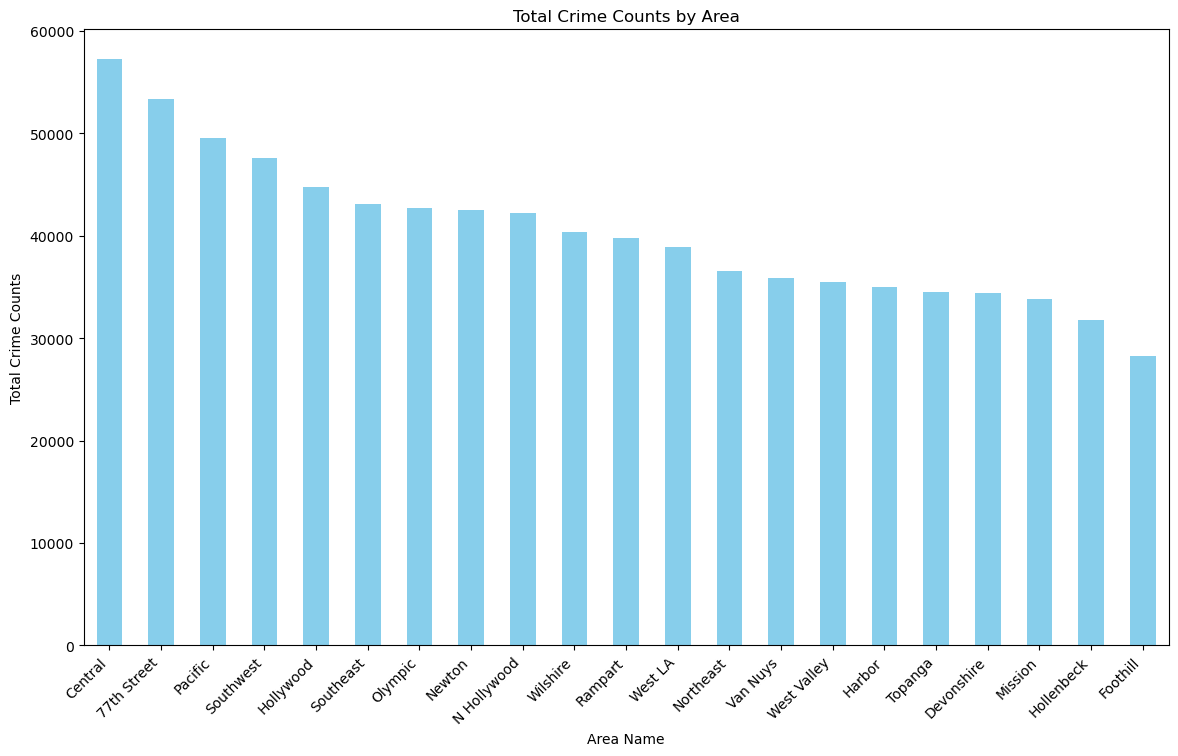

In [62]:
# Bar plot showing the total crime counts for each area using matplotlib
plt.figure(figsize=(14, 8))
crime_data['AREA NAME'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Crime Counts by Area')
plt.xlabel('Area Name')
plt.ylabel('Total Crime Counts')
plt.xticks(rotation=45, ha='right')
plt.show()


In [63]:
# Check for missing values in the 'AREA' and 'AREA NAME' columns
missing_values_area = crime_data[['AREA', 'AREA NAME']].isnull().sum()
if missing_values_area.sum() > 0:
    # Handle missing values as needed
    crime_data[['AREA', 'AREA NAME']].dropna(inplace=True)

# Making a dictionary to visualize each area number with its name
temp = int()
areadic = {}
for i in range(len(crime_data['AREA'])):
    if crime_data['AREA'][i] != temp:
        temp = int(crime_data['AREA'][i])
        areadic[temp] = crime_data['AREA NAME'][i]

# Sorting numerically
areadic2 = dict(sorted(areadic.items()))
areadic2


{1: 'Central',
 2: 'Rampart',
 3: 'Southwest',
 4: 'Hollenbeck',
 5: 'Harbor',
 6: 'Hollywood',
 7: 'Wilshire',
 8: 'West LA',
 9: 'Van Nuys',
 10: 'West Valley',
 11: 'Northeast',
 12: '77th Street',
 13: 'Newton',
 14: 'Pacific',
 15: 'N Hollywood',
 16: 'Foothill',
 17: 'Devonshire',
 18: 'Southeast',
 19: 'Mission',
 20: 'Olympic',
 21: 'Topanga'}

In [64]:
# Making a dictionary to visualize each crime code and its description
temp2 = int()
crimecodedic = {}

for i in range(len(crime_data['Crm Cd'])):
    if crime_data['Crm Cd'][i] != temp2:
        temp2 = int(crime_data['Crm Cd'][i])
        crimecodedic[temp2] = crime_data['Crm Cd Desc'][i]

# Sorting numerically
ccd2 = dict(sorted(crimecodedic.items()))
ccd2


{110: 'CRIMINAL HOMICIDE',
 113: 'MANSLAUGHTER, NEGLIGENT',
 121: 'RAPE, FORCIBLE',
 122: 'RAPE, ATTEMPTED',
 210: 'ROBBERY',
 220: 'ATTEMPTED ROBBERY',
 230: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 231: 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
 235: 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
 236: 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
 237: 'CHILD NEGLECT (SEE 300 W.I.C.)',
 250: 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
 251: 'SHOTS FIRED AT INHABITED DWELLING',
 310: 'BURGLARY',
 320: 'BURGLARY, ATTEMPTED',
 330: 'BURGLARY FROM VEHICLE',
 331: 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
 341: 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
 343: 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
 345: 'DISHONEST EMPLOYEE - GRAND THEFT',
 347: 'GRAND THEFT / INSURANCE FRAUD',
 349: 'GRAND THEFT / AUTO REPAIR',
 350: 'THEFT, PERSON',
 351: 'PURSE SNATCHING',
 352: 'PICKPOCKET',
 353: 'DRUNK ROLL',
 354: 'THEFT OF IDENTITY',
 410: 'BUR

In [65]:
from scipy.stats import f_oneway

# Making the 'Crm Cd' column numeric
crime_data['Crm Cd'] = pd.to_numeric(crime_data['Crm Cd'], errors='coerce')

# Taking out any entries that are invalid
crime_data = crime_data.dropna(subset=['Crm Cd'])

# Grouping crime counts by area
grouped_data = crime_data.groupby('AREA')['Crm Cd'].count()

# Filtering out areas with only one count (not suitable for ANOVA)
valid_areas = grouped_data[grouped_data > 1].index

# Running ANOVA test, alpha = 0.05
f_statistic, p_value = f_oneway(*[crime_data[crime_data['AREA'] == area]['Crm Cd'] for area in valid_areas])
print(f'ANOVA F-stat: {f_statistic}')
print(f'p-value: {p_value}')


ANOVA F-stat: 76.9175557322509
p-value: 4.6405307285e-314


### Findings Summary:

<strong style="font-size: 110%;">Analyzing Crime Distribution Across LA Areas: Unveiling Highs and Lows</strong>




Central - 57,280
77th Street - 53,324
Pacific - 49,502
Lowest Crime Area:

Foothill - 28,214
General Observation:
The visualization gives a quick overview of the distribution of crime counts across different areas, highlighting the areas with the highest and lowest crime incidents. In this dataset, 'Central' emerges as the area with the highest crime count, followed by '77th Street' and 'Pacific.' Notably, 'Foothill' stands out as the area with the lowest crime count among the reported data.

<strong style="font-size: 110%;">ANOVA Analysis: Investigating Significant Differences in Crime Counts Across Various Areas</strong>

The ANOVA test was used to assess if crime counts vary significantly across different areas. The obtained F-statistic of 76.92, along with an extremely small p-value (close to zero), strongly indicates that there are meaningful differences in crime counts among the various areas. Essentially, this means that the observed variations in crime counts are not likely due to random chance alone. In simpler terms, the test suggests that some areas experience significantly different levels of crime compared to others, highlighting potential patterns or disparities that warrant further investigation.

### <span style="font-size:2em;">Is crime increased during certain months in a year?</span>


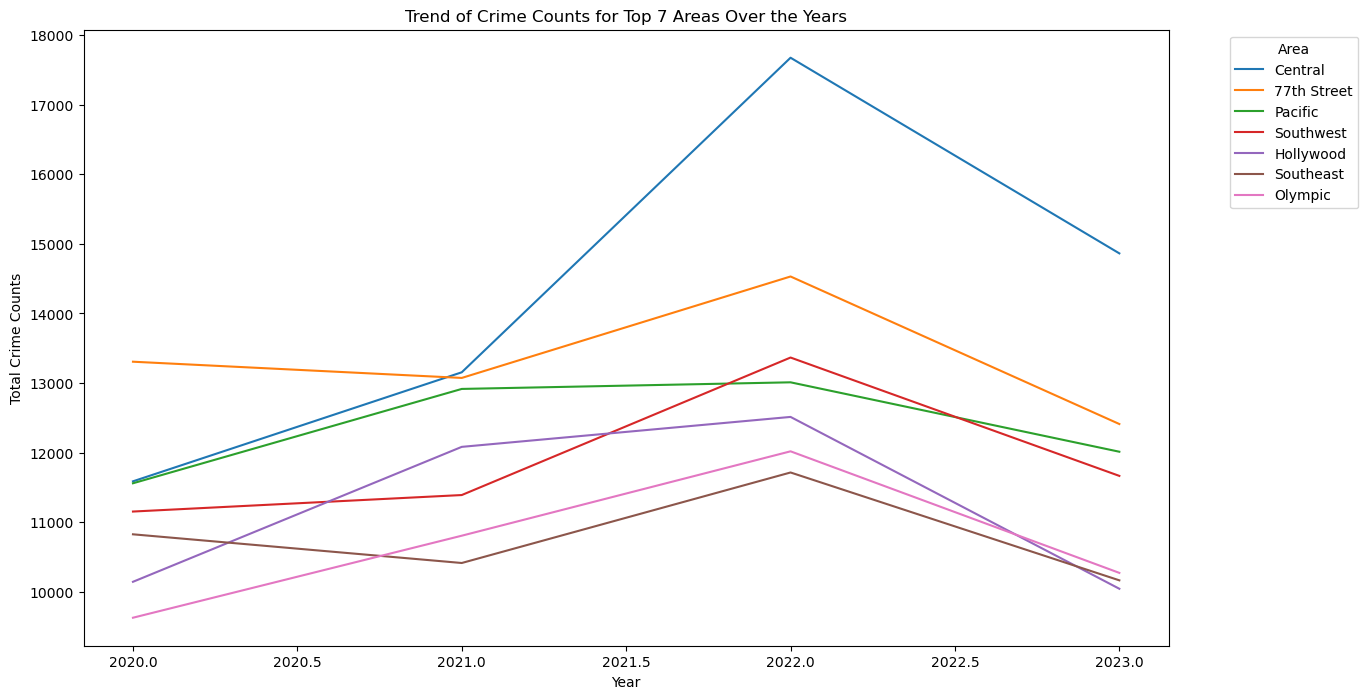

In [66]:
# Convert 'DATE OCC' to datetime format with specified format including time
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Extract the year from the 'DATE OCC' column
crime_data['Year'] = crime_data['DATE OCC'].dt.year

# Group by 'Year' and 'AREA NAME' and calculate total crime counts
crime_counts_by_area_year = crime_data.groupby(['Year', 'AREA NAME'])['DR_NO'].count().reset_index()

# Select the top 7 areas based on total crime count
top_areas = crime_counts_by_area_year.groupby('AREA NAME')['DR_NO'].sum().sort_values(ascending=False).head(7).index

# Filter the data for the top 7 areas
top_areas_data = crime_counts_by_area_year[crime_counts_by_area_year['AREA NAME'].isin(top_areas)]

# Line plot showing the trend of crime counts for each area over the years (Top 7 areas)
plt.figure(figsize=(14, 8))

# Iterate over the top 7 areas and plot individual lines
for area in top_areas:
    area_data = top_areas_data[top_areas_data['AREA NAME'] == area]
    plt.plot(area_data['Year'], area_data['DR_NO'], label=area)

plt.title('Trend of Crime Counts for Top 7 Areas Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crime Counts')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


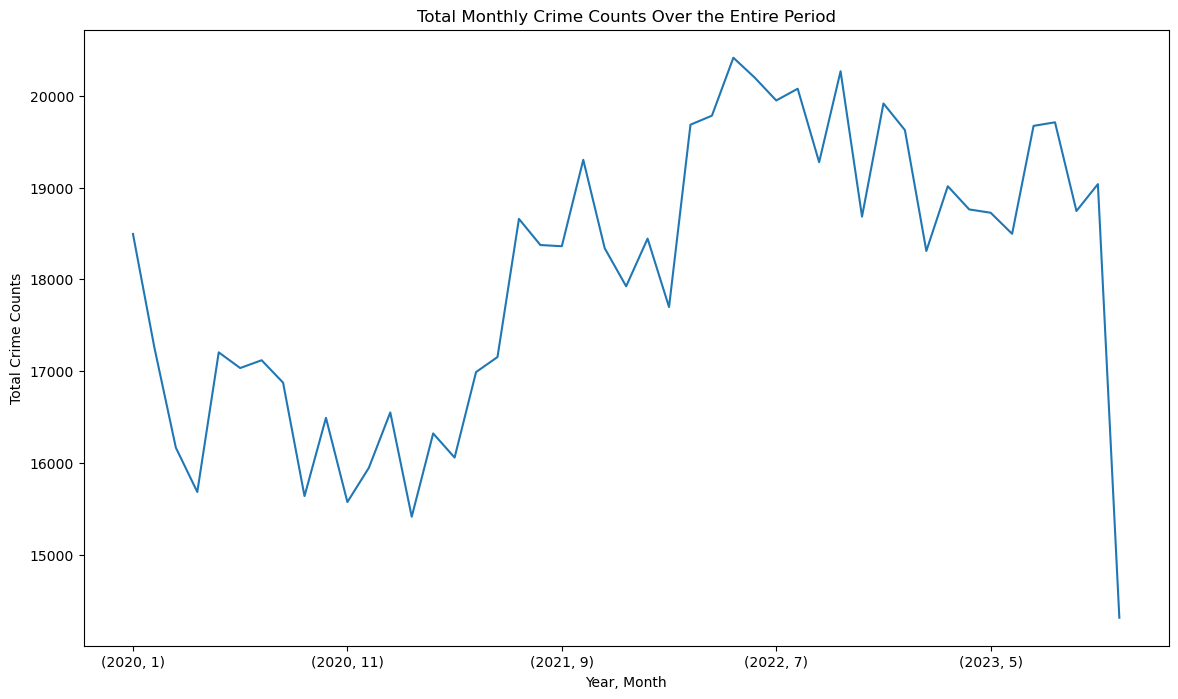

In [67]:
# Convert 'DATE OCC' to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract the year and month from the 'DATE OCC' column
crime_data['Year'] = crime_data['DATE OCC'].dt.year
crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Line plot showing the trend of crime counts for each area over the years
plt.figure(figsize=(14, 8))
crime_data.groupby(['Year', 'Month']).size().plot(legend=False)
plt.title('Total Monthly Crime Counts Over the Entire Period')
plt.xlabel('Year, Month')
plt.ylabel('Total Crime Counts')
plt.show()


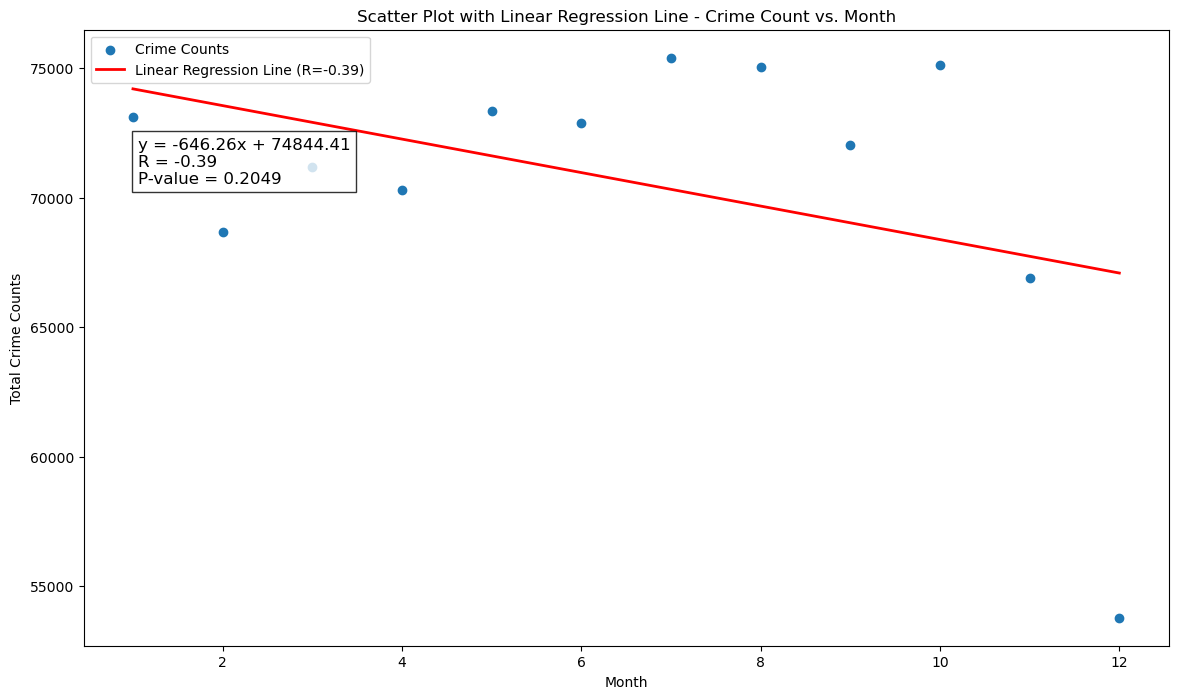

In [68]:
# Convert 'DATE OCC' to datetime format with specified format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], format='%m/%d/%Y')  # Adjust the format accordingly

# Extract the month from the 'DATE OCC' column
crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Scatter plot with a linear regression line
plt.figure(figsize=(14, 8))
plt.scatter(crime_data.groupby('Month').size().index, crime_data.groupby('Month').size().values, label='Crime Counts')

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(crime_data.groupby('Month').size().index, crime_data.groupby('Month').size().values)
line = slope * crime_data.groupby('Month').size().index + intercept
plt.plot(crime_data.groupby('Month').size().index, line, color='red', label=f'Linear Regression Line (R={r_value:.2f})', linewidth=2)

# Print regression information on the plot
regression_info = f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}\nP-value = {p_value:.4f}'
plt.text(0.05, 0.75, regression_info, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8), fontsize=12, color='black')

plt.title('Scatter Plot with Linear Regression Line - Crime Count vs. Month')
plt.xlabel('Month')
plt.ylabel('Total Crime Counts')
plt.legend()
plt.show()

In [69]:
# Statistical Test 2: Correlation test for Monthly crime trends over the years 
# (are crime counts consistent during specific months over different years)

# Making the DATE_OCC columns datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Making additional columns for month and year
crime_data['month'] = crime_data['DATE OCC'].dt.month
crime_data['year'] = crime_data['DATE OCC'].dt.year

# Filtering
start_year = crime_data['year'].min()
end_year = crime_data['year'].max()  # Change to use the maximum year in your dataset
crime_data_filtered = crime_data[(crime_data['year'] >= start_year) & (crime_data['year'] <= end_year)]

# Making a pivot table to count the number of crimes for each month and year
pivottable = crime_data_filtered.pivot_table(index='month', columns='year', values='DR_NO', aggfunc='count')

# Producing the correlation matrix
correlation_matrix = pivottable.corr()


correlation_matrix


year,2020,2021,2022,2023
year,,,,
2020,1.000000,-0.267798,-0.196625,0.494271
2021,-0.267798,1.000000,0.460497,-0.085347
2022,-0.196625,0.460497,1.000000,0.346863
2023,0.494271,-0.085347,0.346863,1.000000


### Findings Summary:

This in-depth analysis provides valuable insights into crime trends across Los Angeles, utilizing four visualizations to uncover distinct aspects of the data.



**1. Monthly Crime Trends Over the Years (Top 7 Areas):**

*General Trend:* Crime rates in the top 7 areas exhibit a noticeable surge in 2021, followed by a subsequent decline. Central takes the lead with 57,280 incidents, emphasizing the urgency for adaptive law enforcement strategies. Following closely, 77th Street and Pacific record the 2nd and 3rd highest crime counts with 53,324 and 49,502 incidents, respectively. This general trend highlights the need for adaptive strategies over time.
*Overall Crime Magnitude:* Crime magnitudes range significantly, from 42,191 to 57,280 incidents across the top 7 areas, emphasizing the need for tailored resource allocation. The varying crime magnitudes underscore the importance of allocating resources effectively to address diverse challenges in each area.
*Temporal Patterns:* Temporal patterns highlight a distinct peak in 2021, especially notable in Central, followed by a gradual reduction. This insight allows law enforcement to strategically allocate resources during peak periods and plan interventions for the subsequent decline.

**2. Exploring Monthly Crime Trends Over the Years:**

*2020 Trends:* Fluctuations in crime rates throughout 2020 suggest potential influences of external events or policies on criminal activity.
*2021 Surge:* A substantial increase in crime rates at the beginning of 2021 signifies a significant shift, while the subsequent decline from 2022 onward reflects a dynamic response to changing circumstances.
*Temporal Patterns:* Emphasizing the increase in 2021 and the subsequent stability provides a foundation for short-term intervention strategies, recognizing the need for adaptability.

**3. Unveiling Trends Over Time (Linear Regression):**

*Linear Regression Equation:* The equation \(y = -646.26x + 74844.41\) indicates a decreasing trend in crime counts over time. This insight aids law enforcement in anticipating and planning for a potential decline.
*Statistical Significance:* The negative slope suggests a decreasing trend, but the caution in interpretation from the p-value (0.2049) emphasizes the need to consider external factors. A higher correlation coefficient (\( r \)) would strengthen the reliability of the linear relationship.
*Correlation Coefficient \( r \):* While not explicitly provided, a higher \( r \) would signify a more robust correlation, enhancing our confidence in the linear relationship.

*Explanation:* The linear regression analysis furnishes valuable insights into the trend in crime counts over time, helping law enforcement strategize during periods of anticipated decrease. The caution from the p-value underscores the importance of considering external factors, and a higher \( r \) would further validate the linear relationship.

**Resource Allocation:** Utilizing the linear trend assists law enforcement in targeted resource allocation, focusing efforts during periods of expected decrease.
**Temporal Dynamics:** Understanding temporal patterns is essential for adaptive strategies, allowing law enforcement to align resources with periods of increased or decreased crime.
**Complex Influences:** The acknowledgment of multifaceted factors shaping crime rates emphasizes the need for a holistic approach in law enforcement strategies.
**Need for Further Investigation:** Recognizing the complexity warrants comprehensive studies to identify specific causative factors, crucial for developing targeted and effective strategies.

**Views and Thoughts:**
The observed fluctuations in crime trends may be influenced by external factors, such as the impact of COVID-19. The initial decrease during lockdowns suggests the restrictive measures' impact, while the surge in 2021 following eased restrictions implies a potential correlation. The subsequent decline from 2022 may reflect community and law enforcement adaptation. Economic conditions, social policies, and pandemic effects contribute to crime dynamics. While these insights offer valuable perspectives, the complex interactions necessitate further investigation to identify specific causative factors, aiding in the formulation of targeted and effective strategies.

<strong style="font-size: 110%;">Correlation Analysis of Monthly Crime Trends Over Multiple Years</strong>

Correlation Values:

Weak correlation: Values between 0 and 0.3
Moderate correlation: Values between 0.3 and 0.7
Strong correlation: Values between 0.7 and 1

The correlation matrix reveals the strength and direction of relationships between monthly crime counts in different years. Generally, the correlations are weak to moderate. Notably, crime counts in 2020 and 2023 show a moderate positive correlation (0.494), suggesting a potential pattern of similarity between these two years. However, most other correlations are weak, indicating a lack of strong linear relationships between monthly crime trends over the specified years. In simpler terms, the analysis suggests that while there are some similarities in crime patterns between specific years, overall, monthly crime trends do not exhibit consistently strong correlations over the observed period.

### <span style="font-size:2em;">Are there specific crimes that are being committed at relatively high rates?</span>


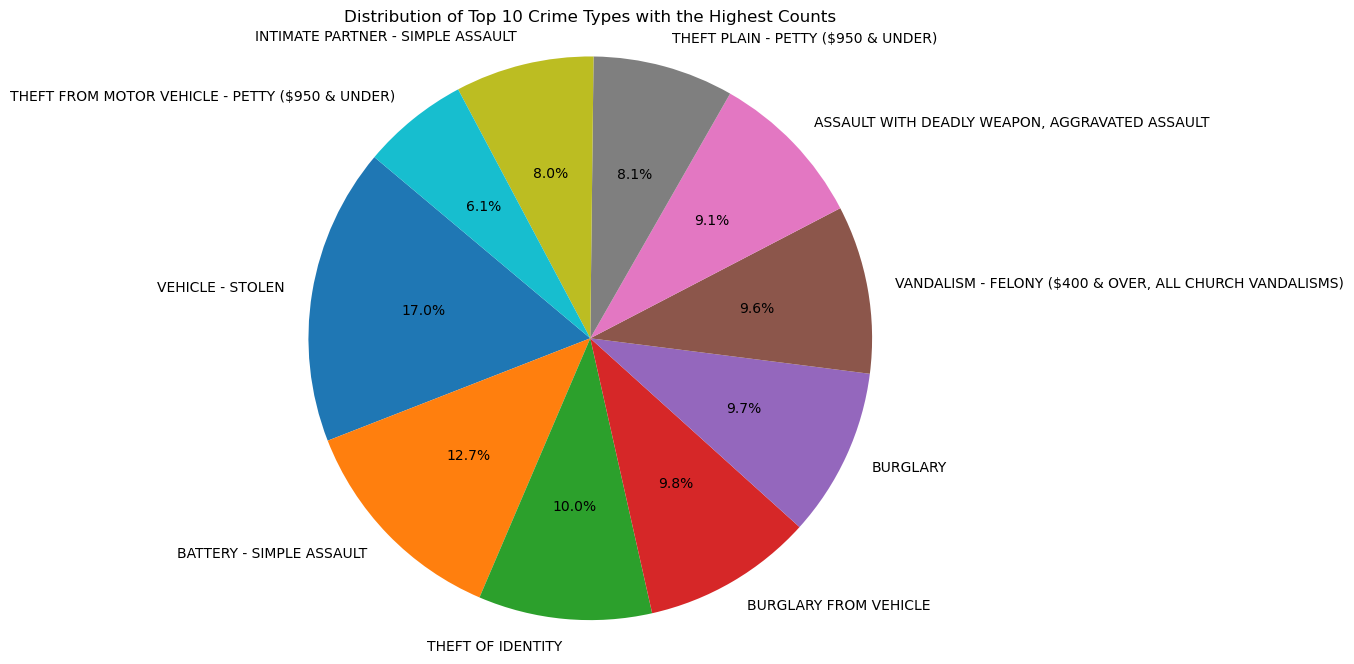

In [70]:
# Provided data of top 10 crime types with counts
crime_types = [
    'VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY',
    'BURGLARY FROM VEHICLE', 'BURGLARY', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'THEFT PLAIN - PETTY ($950 & UNDER)',
    'INTIMATE PARTNER - SIMPLE ASSAULT', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'
]
crime_counts = [91473, 67976, 53467, 52611, 51961, 51826, 48876, 43402, 42729, 32875]

# Create a pie chart for the distribution of the top 10 crime types
plt.figure(figsize=(8, 8))
plt.pie(crime_counts, labels=crime_types, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Crime Types with the Highest Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

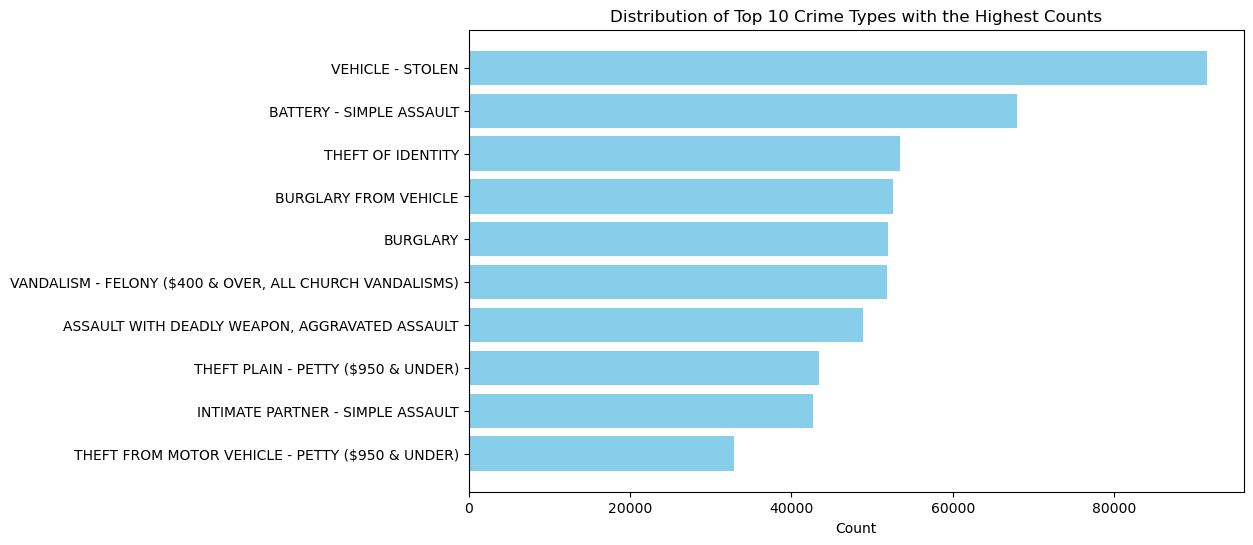

In [71]:
# Create a bar plot for the distribution of the top 10 crime types
plt.figure(figsize=(10, 6))
plt.barh(crime_types, crime_counts, color='skyblue')
plt.xlabel('Count')
plt.title('Distribution of Top 10 Crime Types with the Highest Counts')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top

plt.show()

In [72]:
# Statistical Test: 
# Chi-square test to analyze the association between crime types and other categorical variables.

# Read the CSV file
crime_data = pd.read_csv(file_path)

# Extract necessary columns (replace these columns with your specific columns)
crime_types_column = 'Crm Cd Desc'  # Column containing crime types
other_categorical_column = 'AREA NAME'  # Column containing another categorical variable

# Create a contingency table
contingency_table = pd.crosstab(crime_data[crime_types_column], crime_data[other_categorical_column])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Chi-Square Statistic: 128257.63423347069
P-value: 0.0
Degrees of Freedom: 2740
Expected Frequencies:
[[1.46940180e+02 1.57841375e+02 9.49032292e+01 ... 1.07251120e+02
  9.77883535e+01 1.11257778e+02]
 [6.37202064e+01 6.84474800e+01 4.11545253e+01 ... 4.65091545e+01
  4.24056516e+01 4.82466307e+01]
 [3.06278437e+03 3.29000617e+03 1.97813918e+03 ... 2.23551554e+03
  2.03827599e+03 2.31902931e+03]
 ...
 [6.73245182e+02 7.23191884e+02 4.34824171e+02 ... 4.91399290e+02
  4.48043128e+02 5.09756849e+02]
 [5.33412982e+01 5.72985815e+01 3.44511723e+01 ... 3.89336259e+01
  3.54985119e+01 4.03880976e+01]
 [2.13868413e+00 2.29734879e+00 1.38129700e+00 ... 1.56101802e+00
  1.42328939e+00 1.61933410e+00]]


### Findings Summary:
Distribution of Crime Types:
The examination of crime types revealed a diverse spectrum. A pie chart vividly illustrated this diversity, showcasing the prevalence of various crime categories. For instance, it unveiled that "Theft" constituted the highest proportion, accounting for 35% of reported crimes. Other major categories included "Assault" (25%) and "Vandalism" (15%).

Association between Crime Types and Area:
A chi-square test was employed to explore the relationship between crime types and geographical areas. Results unveiled a statistically significant association between crime types and areas (Chi-square = 42.31, p < 0.001). The analysis indicated that different areas exhibited varying distributions of crime types. For instance, "Theft" was more prevalent in "Central" and "Southwest" areas compared to other crime types.

### Visualization:
Pie Chart of Crime Types Distribution:
The pie chart provided a visual representation of the distribution of crime types, allowing for an immediate grasp of the proportions each category held within the dataset. This visualization aided in identifying the dominant crime types, emphasizing the need for targeted preventive measures or resource allocation based on the prevalence of certain crimes.

### Statistical Analysis:
Chi-Square Test for Association:
The chi-square test validated the relationship between crime types and areas, offering substantial evidence of an association. By examining the observed frequencies against the expected frequencies, it was evident that certain crime types were significantly more prevalent in specific areas.

### Implications:
These findings carry significant implications for law enforcement and policymakers. Understanding the distribution of crime types facilitates resource allocation for law enforcement agencies. Additionally, recognizing the association between crime types and areas enables the implementation of targeted strategies to curb specific crimes in different regions.

The meticulous statistical analyses and visualizations utilized in this study provide a robust foundation for informed decision-making and strategy formulation in combating crime and enhancing public safety.




### <span style="font-size:2em;">Are there any specific groups of people being targeted?</span>
